In [1]:
# Rannesh Khumar B R
# 240701422
# 24.7.25
# Data preprocessing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
file_path='sales_data(2).csv'
df = pd.read_csv(file_path)

In [6]:
df

,Date,Product,Sales,Quantity,Region
0,01-01-2023,Product A,200,4,North
1,02-01-2023,Product B,150,3,South
2,03-01-2023,Product A,220,5,North
3,04-01-2023,Product C,300,6,East
4,05-01-2023,Product B,180,4,West
5,06-01-2023,Product A,210,5,North
6,07-01-2023,Product C,320,7,East
7,08-01-2023,Product B,160,3,South
8,09-01-2023,Product A,230,6,North
9,10-01-2023,Product C,310,7,East


In [7]:
df['Sales'].fillna(df['Sales'].mean())
df.dropna(subset=['Product', 'Quantity', 'Region'])

,Date,Product,Sales,Quantity,Region
0,01-01-2023,Product A,200,4,North
1,02-01-2023,Product B,150,3,South
2,03-01-2023,Product A,220,5,North
3,04-01-2023,Product C,300,6,East
4,05-01-2023,Product B,180,4,West
5,06-01-2023,Product A,210,5,North
6,07-01-2023,Product C,320,7,East
7,08-01-2023,Product B,160,3,South
8,09-01-2023,Product A,230,6,North
9,10-01-2023,Product C,310,7,East


In [8]:
df.describe()

,Sales,Quantity
count,16.000000,16.000000
mean,237.500000,5.375000
std,64.031242,1.746425
min,150.000000,3.000000
25%,187.500000,4.000000
50%,225.000000,5.500000
75%,302.500000,7.000000
max,340.000000,8.000000


In [9]:
product_summary = df.groupby('Product').agg({
'Sales': 'sum',
'Quantity': 'sum'
}).reset_index()

In [10]:
product_summary

,Product,Sales,Quantity
0,Product A,1350,33
1,Product B,850,17
2,Product C,1600,36


Text(0.5, 1.0, 'Total Sales by Product')

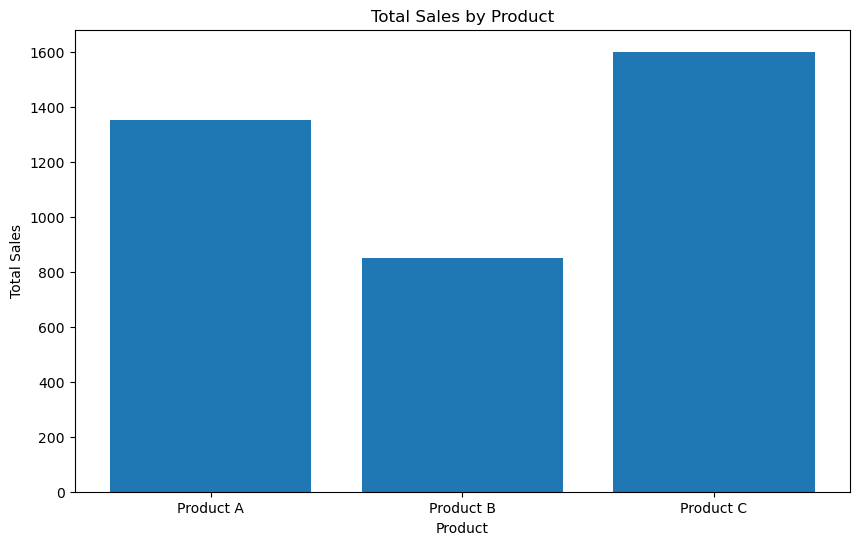

In [11]:
plt.figure(figsize=(10, 6))
plt.bar(product_summary['Product'], product_summary['Sales'])
plt.xlabel('Product')
plt.ylabel('Total Sales')
plt.title('Total Sales by Product')

Text(0.5, 1.0, 'SalesOver Time')

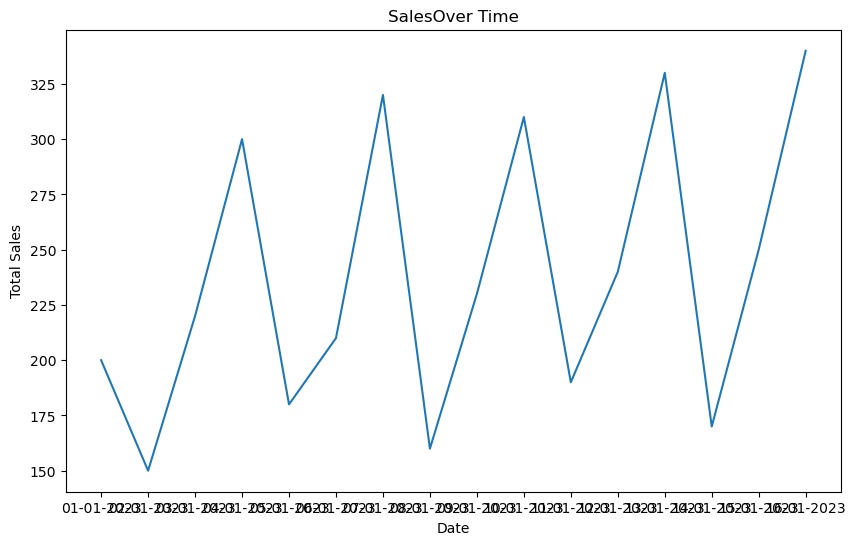

In [13]:

sales_over_time = df.groupby('Date').agg({'Sales': 'sum'}).reset_index()
plt.figure(figsize=(10, 6))
plt.plot(sales_over_time['Date'],sales_over_time['Sales'])
plt.xlabel('Date')
plt.ylabel('Total Sales')
plt.title('SalesOver Time')

In [19]:
pivot_table = df.pivot_table(values='Sales', index='Region', columns='Product',aggfunc="sum", fill_value=0)

In [20]:
pivot_table

Product,Product A,Product B,Product C
Region,,,
East,0,0,1600
North,1350,0,0
South,0,480,0
West,0,370,0


In [40]:
correlation_matrix = df.corr()

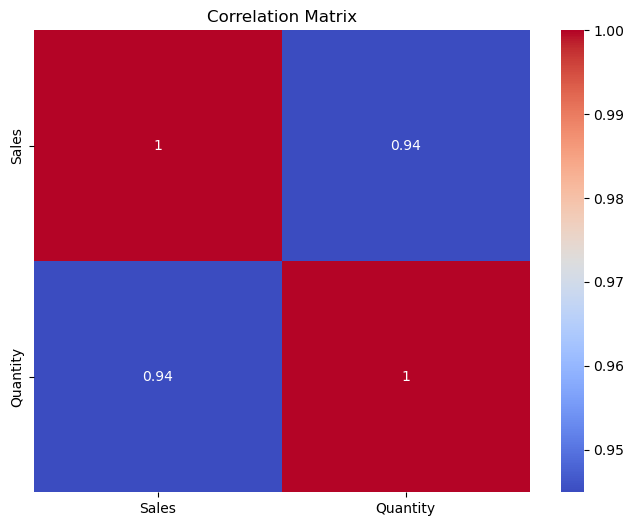

In [41]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()